#                          Classificação utilizando Decision Trees

**Introdução**
Esse código irá identificar o risco de emprétimos bancários utilizando árvore de decisão com os dados disponíveis no [GitHub Decision Tree](https://raw.githubusercontent.com/PECCE-IFSC/SNCT_2018/master/DecisionTree_Credit/credit.csv).

O _dataset_ que será analisado contém as seguintes colunas:
* **checking_balance** : Saldo bancário;
* **months_loan_duration**: Em quantos meses o empréstimo será quitado;
* **purpose**: Motivo do empréstimo;
* **amount**: Valor desejado;
* **savings_balance**: Economias;
* **employment_length**: Há quanto tempo a pessoa está trabalhando;
* **installment_rate**: Taxa de parcelamento;
* **personal_status**: Estado Civil;
* **other_debtors**: outros fiadores;
* **residence_history**: Histórico de residências;
* **property**: Propriedades;
* **age**: Idade;
* **installment_plan**: Plano de parcelamento;
* **housing**: Tipo de moradia - aluguel,  casa própria ...
* **existing_credits**: Crédito existente; 
* **default**: Empréstimo pago ou não - 1:pago, 2:não pago;
* **dependents**: Dependentes;
* **telephone**: Telefone;
* **foreign_worker**: Trabalhador estrangeiro
* **job**: Ocupação - empresário, empregado.....

## 1 Coleta dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# importar os dados 
file = pd.read_csv("https://raw.githubusercontent.com/PECCE-IFSC/Oficina_2019/master/credit.csv")
# verificar características de cada coluna. 
file.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
# verificar as dimensões do Data frame
print(file.shape)

(1000, 21)


## 2 Analisar a relevancia de cada característica

* Utiliza-se a biblioteca `matplotlib` para gerar um [histograma](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html), para analisar a relação entre as características do conjunto de dados

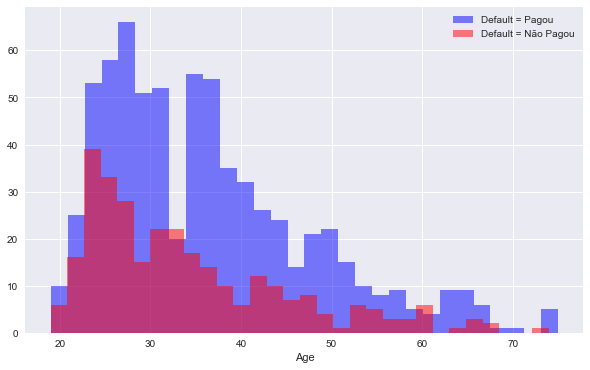

In [4]:
#É uma palavra chave para que os gráficos sejam mostrados no seu notebook
%matplotlib inline  

# Primeiro determina-se o tamanho desejado da figura que será gerada
plt.figure(figsize=(10,6))
# Análise da coluna 'default' em relação a coluna 'age'
# Para poder analisar melhor os resultados, para cada resposta de 'default', o histograma é gerado com uma cor diferente
file[file['default']==1]['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Default = Pagou')
file[file['default']==2]['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Default = Não Pagou')
plt.legend()
plt.xlabel('Age')

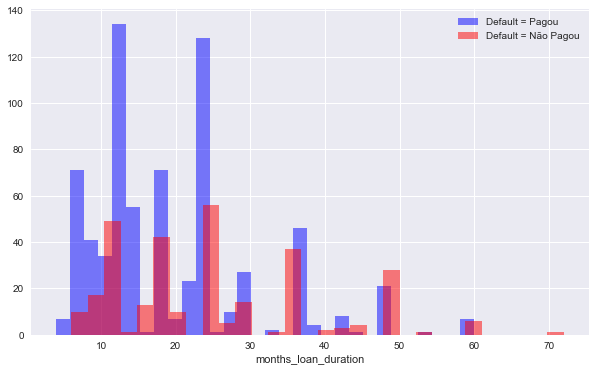

In [5]:
plt.figure(figsize=(10,6))
# Análise da coluna 'default' em relação a coluna 'months_loan_duration'
file[file['default']==1]['months_loan_duration'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Default = Pagou')
file[file['default']==2]['months_loan_duration'].hist(alpha=0.5,color='red',
                                              bins=30,label='Default = Não Pagou')
plt.legend()
plt.xlabel('months_loan_duration')

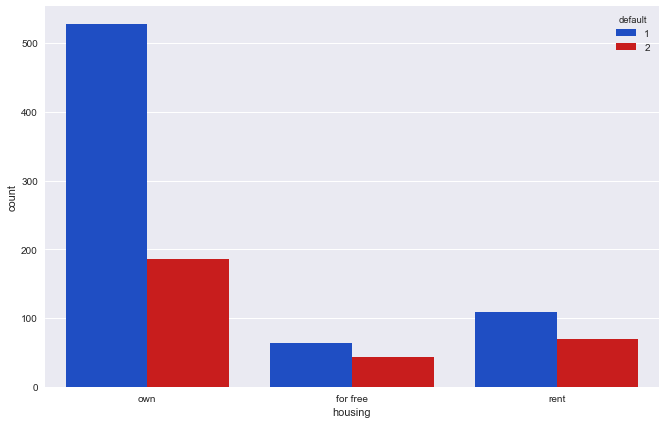

In [6]:
plt.figure(figsize=(11,7))
# Análise da coluna 'default' em relação a coluna 'housing'
colors = ["blue", "red"]
sns.countplot(x='housing',hue='default',data=file,palette= sns.xkcd_palette(colors))

### Exercício
* Análise uma característica diferente das citadas anteriormente

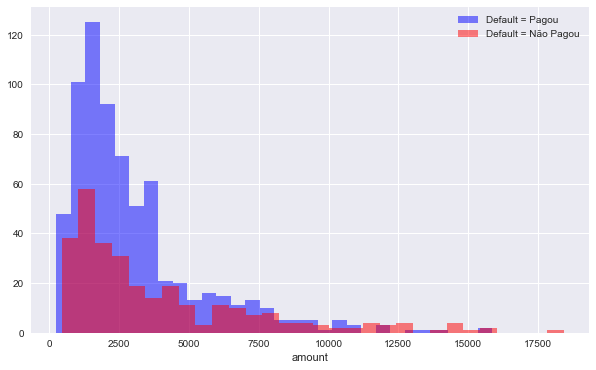

In [7]:
plt.figure(figsize=(10,6))
file[file['default']==1]['amount'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Default = Pagou')
file[file['default']==2]['amount'].hist(alpha=0.5,color='red',
                                              bins=30,label='Default = Não Pagou')
plt.legend()
plt.xlabel('amount')

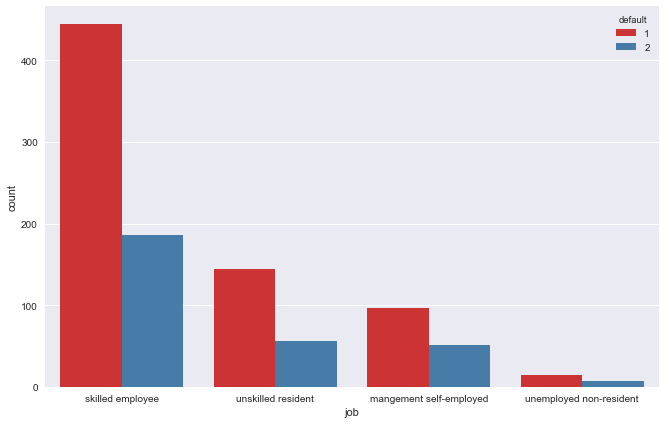

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='job',hue='default',data=file,palette='Set1')

## 3 Preparação dos dados

* Utilizou-se a função **LabelEncoder()** para transformar as características com dados nominais em dados numéricos.
* A função **LabelEncoder.fit_transform** ajusta as características e retorna os dados codificados

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['checking_balance', 'savings_balance', 
            'employment_length', 'credit_history', 
            'purpose', 'personal_status', 'other_debtors', 
            'property', 'installment_plan', 'housing', 
            'telephone', 'foreign_worker', 'job']:
    file[col] = le.fit_transform(file[col])

### Exercício
* Verifique os tipos de dados de cada coluna após a codificação

In [10]:
# verificar os tipos dos dados 
file.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,0,7,1169,4,3,4,3,2,...,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,...,2,22,1,1,1,2,1,0,1,1
2,3,12,0,4,2096,2,2,2,3,2,...,2,49,1,1,1,1,2,0,1,3
3,1,42,4,5,7882,2,2,2,3,1,...,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,...,3,53,1,0,2,2,2,0,1,1


## 4 Separação dos dados 
* Utilizou-se a função **train_test_split** para separar os dados em teste e treino, 10% (`test_size = 0.1`) e 90%, respectivamente

In [11]:
from sklearn.model_selection import train_test_split
credit_train, credit_test = train_test_split(file, test_size = 0.1, 
                                             random_state = 123)

In [12]:
# Separar a coluna 'default' de credit_train
train_labels = credit_train.pop('default')


### Exercício
* Separar a coluna `default` do `credit_test`, armazenando-o em `test_labels`

In [13]:
# Separar a coluna 'default' de credit_test
test_labels = credit_test.pop('default')

##  5 Treinar o modelo
### Exercício
* A partir da biblioteca **sklearn.tree** importou-se a classe `DecisionTreeClassifier`
* Crie uma instância da classe com a função  **DecisionTreeClassifier()**, utilize a profundidade (`max_depth`) igual a 4.
* Treine o algorítmo DecisionTreeClassifier, utilizando a função **DecisionTreeClassifier.fit()**
* Com a função **DecisionTreeClassifier.predict()**, teste o código usando o DataFrame `credit_data`.

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Crie um instância da classe
DTC = DecisionTreeClassifier(max_depth = 5)

# Treine o algoritmo DecisionTreeClassifier
DTC = DTC.fit(credit_train, train_labels)

# Teste o algoritmo
y_predict = DTC.predict(credit_test)

## 6 Avaliando o desempenho do modelo
* A partir da biblioteca **sklearn.metrics** importaram-se as funções `accuracy_score` e `confusion_matrix`
* Calculou-se a exatidão utilizando a função **accuracy_score**

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix_ = pd.DataFrame (confusion_matrix(test_labels, y_predict), 
                                  columns =['Previsto como Pagamento Realizado', 'Previsto como Pagamento Não Realizado'], 
                                  index =['Pagamento Realizado', 'Pagamento Não Realizado'])

print(accuracy_score (test_labels, y_predict))
confusion_matrix_

0.69


,Previsto como Pagamento Realizado,Previsto como Pagamento Não Realizado
Pagamento Realizado,63,3
Pagamento Não Realizado,28,6


## 7 Exportar a árvore de decisão
* Para visualizar a árvore de decisão é necessário criar um arquivo em formato DOT, utilizando a função **export_graphviz**, e então utilizar o seguinte site: [Graphviz](http://www.webgraphviz.com/) para exibir a árvore com os dados gerados.

In [16]:
from sklearn.tree import export_graphviz
with open("CREDIT_TREE.txt", "w") as f:
    f = export_graphviz(DTC, out_file=f, class_names = ['pagou', 'nao pagou'],
                        filled = True, feature_names = list(credit_test.columns))
    